In [202]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

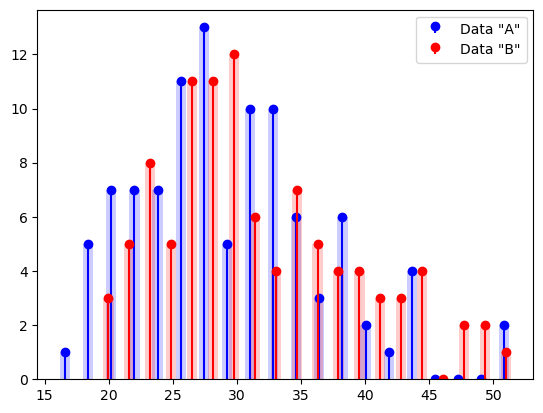

In [203]:
N = 100

r = np.random.randn(N)
r[r > 0] = np.log(1 + r[r > 0])
data_a = 29 - r * 10

y_a, x_a = np.histogram(data_a, 20)
x_a = (x_a[:-1] + x_a[1:]) / 2

r = np.random.randn(N)
r[r > 0] = np.log(1 + r[r > 0])
data_b = 30 - r * 10

y_b, x_b = np.histogram(data_b, 20)
x_b = (x_b[:-1] + x_b[1:]) / 2

plt.stem(x_a, y_a, 'b', markerfmt='bo', basefmt=' ', label='Data "A"')
plt.stem(x_b, y_b, 'r', markerfmt='ro', basefmt=' ', label='Data "B"')
plt.bar(x_a, y_a, color='b', alpha=0.2)
plt.bar(x_b, y_b, color='r', alpha=0.2)

plt.legend()
plt.show()

In [204]:
all_data = np.hstack((data_a, data_b))

conds = np.hstack((np.ones(N), 2 * np.ones(N)))

In [205]:
fake_conds = np.random.permutation(N * 2)

fake_conds[fake_conds < N] = 1
fake_conds[fake_conds >= N] = 2

print([np.mean(all_data[conds == 1]), np.mean(all_data[conds == 2])])

print([np.mean(all_data[fake_conds == 1]), np.mean(all_data[fake_conds == 2])])

[29.36620060247932, 31.598939300804314]
[29.921471717099358, 31.043668186184274]


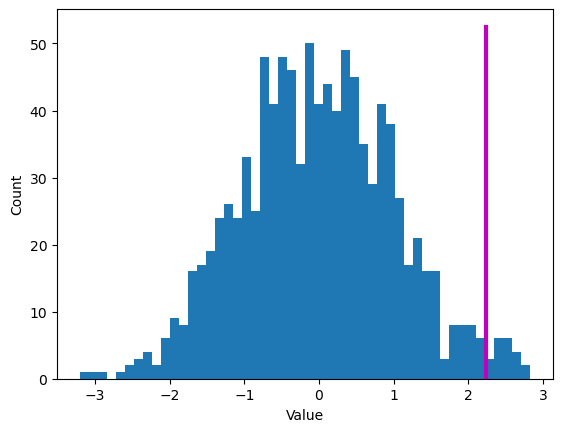

In [206]:
n_perms = 1000
perm_diffs = np.zeros(n_perms)

for permi in range(n_perms):
    
    f_conds = np.random.permutation(N * 2)
    f_conds[f_conds < N] = 1
    f_conds[f_conds >= N] = 2
    
    perm_diffs[permi] = np.mean(all_data[f_conds == 2]) - np.mean(all_data[f_conds == 1])
    
obs_val = np.mean(all_data[conds == 2]) - np.mean(all_data[conds == 1])

plt.hist(perm_diffs, 50)
y_lim = plt.ylim()
plt.plot([obs_val, obs_val], y_lim, 'm', linewidth=3)
plt.xlabel('Value')
plt.ylabel('Count')

plt.show()

In [208]:
z_val = (obs_val - np.mean(perm_diffs)) / np.std(perm_diffs, ddof=1)
p_val = 1 - stats.norm.cdf(np.abs(z_val))

p_count = np.sum(perm_diffs > obs_val) / n_perms

print(p_val, p_count)

0.01471218644678629 0.02


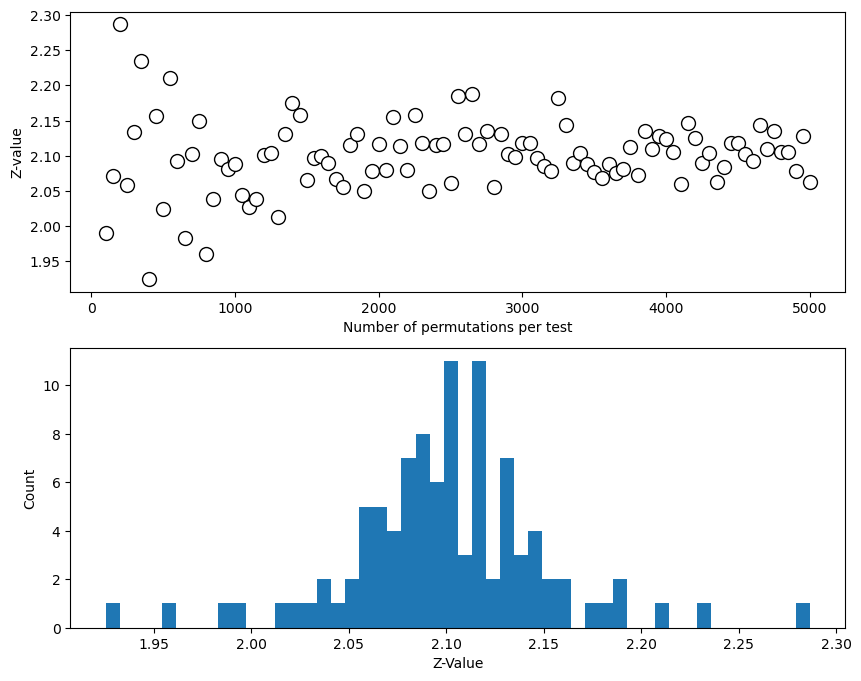

In [251]:
n_perms = np.arange(100, 5001, 50)
z_vals = np.ones(len(n_perms))
obs_val = np.mean(all_data[conds == 2]) - np.mean(all_data[conds == 1])

for i, perm_i in enumerate(n_perms):
    
    perm_diff = np.ones(perm_i)
    for perm_j in range(perm_i):
        
        f_conds = np.random.permutation(N * 2)
        f_conds[f_conds < N] = 1
        f_conds[f_conds >= N] = 2
        
        perm_diff[perm_j] = np.mean(all_data[f_conds == 2]) - np.mean(all_data[f_conds == 1])
        
    z_vals[i] = (obs_val - np.mean(perm_diff)) / np.std(perm_diff, ddof=1)
    
    
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

ax[0].plot(n_perms, z_vals, 'ko', markerfacecolor='w', markersize=10)
ax[0].set_xlabel('Number of permutations per test')
ax[0].set_ylabel('Z-value')

#import seaborn as sns
#sns.histplot(z_vals, ax=ax[1])
ax[1].hist(z_vals, 50)
ax[1].set_xlabel('Z-Value')
ax[1].set_ylabel('Count')

plt.show()